<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW2_PROB_1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
m = len(housing)
m

545

In [7]:
housing.shape

(545, 13)

In [8]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [10]:
df_test.shape

(109, 13)

In [11]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
22,8050,3,1,1,1,8645000
41,6360,3,2,4,0,7840000
91,6750,2,1,1,2,6419000
118,6420,3,1,1,0,5950000
472,3630,4,1,2,3,3010000


In [12]:
df_Newtrain.shape

(436, 6)

In [13]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [14]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking
22,8050,3,1,1,1
41,6360,3,2,4,0
91,6750,2,1,1,2
118,6420,3,1,1,0
472,3630,4,1,2,3


In [15]:
y_Newtrain.head()

22     8645000
41     7840000
91     6419000
118    5950000
472    3010000
Name: price, dtype: int64

In [16]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [ 8645000  7840000  6419000  5950000  3010000  3850000 12250000  4480000
  5110000  4319000]


In [17]:
X1 = df_Newtrain.values[:, 0]
X2 = df_Newtrain.values[:, 1]
X3 = df_Newtrain.values[:, 2]
X4 = df_Newtrain.values[:, 3]
X5 = df_Newtrain.values[:, 4]

In [18]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [19]:
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)

In [20]:
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
X [: 5]

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 0.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 3.00e+00]])

In [21]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [22]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [23]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,parking
265,2880,3,1,2,0
54,6000,3,2,2,1
171,10269,3,1,1,1
244,5320,3,1,2,0
268,4950,4,1,2,0


In [24]:
y_Newtest.head()

265    4403000
54     7350000
171    5250000
244    4550000
268    4382000
Name: price, dtype: int64

In [25]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [4403000 7350000 5250000 4550000 4382000 4690000 8540000 5250000 2730000
 5950000]


In [26]:
# preparing the testing/validation set
X1_test = df_Newtest.values[:, 0]
X2_test = df_Newtest.values[:, 1]
X3_test = df_Newtest.values[:, 2]
X4_test = df_Newtest.values[:, 3]
X5_test = df_Newtest.values[:, 4]

In [27]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [28]:
X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)

In [29]:
# Stacking X_0_test through X_5_test horizontally
# This is the final X Matrix for validation
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))
X_test [: 5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00]])

In [30]:
# defining function for computing the cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [31]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta, m)
cost

13238799902211.697

In [32]:
# gradient descent algorithm

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # loss for training set
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # loss for validation set

    return theta, cost_history, cost_test

In [33]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 200;
alpha = 0.01

In [34]:
# Computing final theta values and cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [nan nan nan nan nan nan]
cost_history = [1.11634504e+024 1.07910609e+035 1.04310935e+046 1.00831339e+057
 9.74678147e+067 9.42164908e+078 9.10736243e+089 8.80355973e+100
 8.50989126e+111 8.22601896e+122 7.95161605e+133 7.68636665e+144
 7.42996542e+155 7.18211720e+166 6.94253668e+177 6.71094807e+188
 6.48708478e+199 6.27068910e+210 6.06151194e+221 5.85931248e+232
 5.66385799e+243 5.47492345e+254 5.29229137e+265 5.11575152e+276
 4.94510067e+287 4.78014238e+298             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             nan
             nan           

<ipython-input-30-4166a4bb564a>:6: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
<ipython-input-32-feeffb367fdb>:10: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta;


Text(0.5, 1.0, 'Convergence of Gradient Descent')

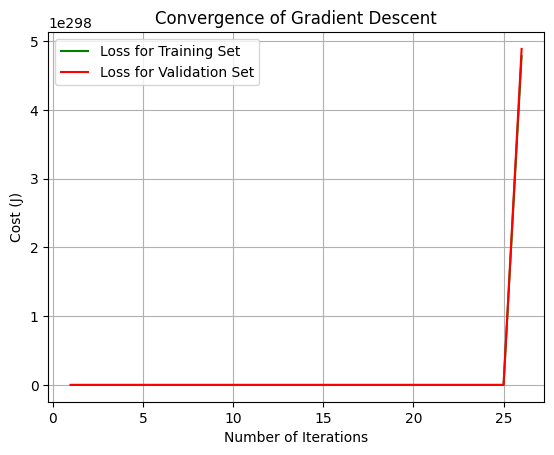

In [35]:
plt.plot(range(1, iterations + 1),cost_history, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')